<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EB%8B%A4%EC%96%91%ED%95%9C_%EC%B5%9C%EC%A0%81%ED%99%94_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84_%EC%A0%81%EC%9A%A9%ED%95%98%EA%B3%A0_%EC%84%B1%EB%8A%A5_%EB%86%92%EC%97%AC%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

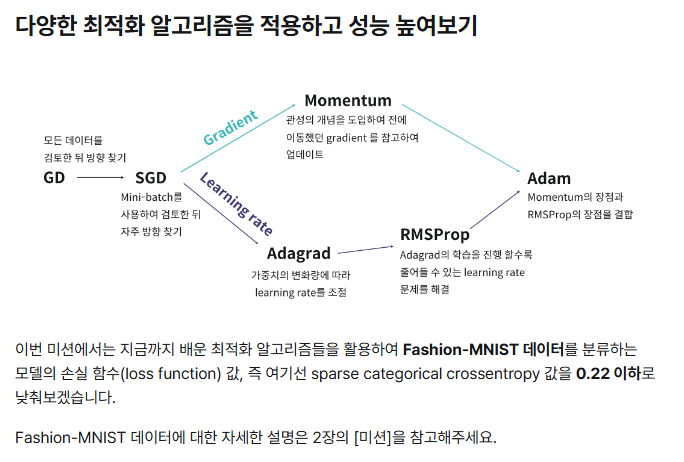

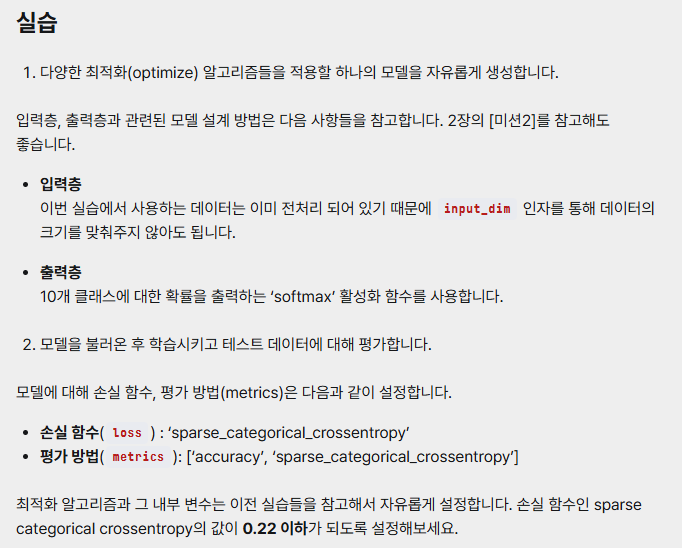

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

np.random.seed(100)
tf.random.set_seed(100)

'''
1. 다양한 최적화 알고리즘들을 적용할 하나의 모델을 자유롭게 생성합니다.
'''

def OUR_model():

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

'''
2. 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. OUR_model 함수를 이용해 모델을 불러옵니다.

   Step02. 모델의 손실 함수, 최적화 알고리즘, 평가 방법을 설정합니다.

   Step03. 모델을 각각 학습시킵니다. 검증용 데이터도 설정해주세요.
           모델의 'epochs'는 20, 'batch_size'는 500으로 설정합니다.

   Step04. 학습된 모델을 테스트하고 sparse categorical crossentropy
           값을 출력합니다. 모델의 성능을 확인해보고, 목표값을 달성해보세요.
'''

def main():

    # Fashion mnist data 를 load 합니다.
    train_data = np.loadtxt('./data/train_images.csv', delimiter =',', dtype = np.float32)
    train_labels = np.loadtxt('./data/train_labels.csv', delimiter =',', dtype = np.float32)
    test_data = np.loadtxt('./data/test_images.csv', delimiter =',', dtype = np.float32)
    test_labels = np.loadtxt('./data/test_labels.csv', delimiter =',', dtype = np.float32)

    train_data = train_data / 255.0
    test_data = test_data / 255.0

    our_model = OUR_model()

    opt = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.69, beta_2=0.6999)
    our_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy', 'sparse_categorical_crossentropy'])
    history = our_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores = our_model.evaluate(test_data, test_labels, verbose=0)

    print('\nscores: ', scores[-1])

    Visulaize([('our_model', history)])

    return history

if __name__ == "__main__":
    main()

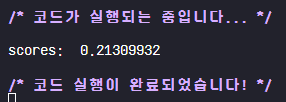

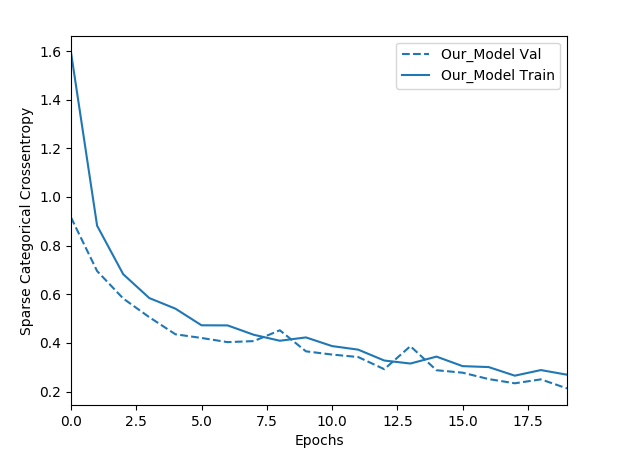